### refer to: https://www.tensorflow.org/tutorials/quickstart/beginner

* train and test data loaded, shape is: (60000, 28, 28)
10000/1 - 0s - loss: 0.0423 - accuracy: 0.9737
* finish test, lost is 0.07952159819463268, accuracy is 0.9736999869346619


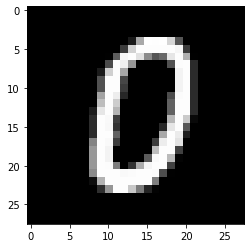

*result number is: 0


In [38]:
# %load_ext lab_black

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rdm
from os import path, curdir, makedirs

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("* train and test data loaded, shape is: {}".format(x_train.shape))

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model_path = path.abspath(path.join(curdir, "model_mnist_num"))
makedirs(model_path, exist_ok=True)

model_path = path.join(model_path, "model")
if not path.exists("{}.index".format(model_path)):
    model.fit(x_train, y_train, epochs=5)
    model.save_weights(model_path)
else:
    model.load_weights(model_path)

lost, accuracy = model.evaluate(x_test, y_test, verbose=2)
print("* finish test, lost is {}, accuracy is {}".format(lost, accuracy))

random_idx = rdm.randint(0, len(x_test))

select_img = np.array([x_test[random_idx]])  # select random image from test list
plt.imshow(select_img.reshape((28, 28)), cmap="gray")
plt.show()

result_num = np.argmax(model.predict(select_img)[0])
print("*result number is: {}".format(result_num))

### refer to: https://www.tensorflow.org/tutorials/keras/classification

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5351 - accuracy: 0.8111
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4013 - accuracy: 0.8542
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3670 - accuracy: 0.8663
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3458 - accuracy: 0.8741
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3307 - accuracy: 0.8773
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3157 - accuracy: 0.8844
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3071 - accuracy: 0.8862s - loss: 0.3069 - accu
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2988 - accuracy: 0.8897
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2912 - accuracy

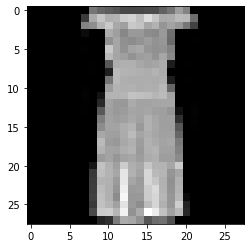

* result is "Dress"


In [29]:
# %load_ext lab_black

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

data = tf.keras.datasets.fashion_mnist
(imgs_train, labels_train), (imgs_test, labels_test) = data.load_data()
imgs_train, imgs_test = imgs_train / 255.0, imgs_test / 255.0

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(imgs_train, labels_train, epochs=10)

lost, accuracy = model.evaluate(imgs_test, labels_test, verbose=2)
print("* finish test, lost is {}, accuracy is {}".format(lost, accuracy))

random_idx = rdm.randint(0, len(imgs_test))

select_img = np.array([imgs_test[random_idx]])  # select random image from test list
plt.imshow(select_img.reshape((28, 28)), cmap="gray")
plt.show()

result_idx = np.argmax(model.predict(select_img)[0])
result_cls = class_names[result_idx]
print('* result is "{}"'.format(result_cls))